In [108]:
import seaborn as sns

from simulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
alpha_prefs = 1
alpha_caps = 2
n_roles = 10
n_persons = 1_000
total_cap = 1_000
n_simulations = 200
simulations = run_simulation(alpha_prefs=alpha_prefs, alpha_caps=alpha_caps, n_roles=n_roles, n_persons=n_persons, total_cap=total_cap, n_sims=n_simulations)


Simulations:  92%|█████████▏| 922/1000 [06:26<00:33,  2.34it/s]

In [58]:
df = make_df(simulations)

In [86]:
a = simulations[125]

In [88]:
a.experiments[1].caps

array([ 34,   2,   2,  83,  14,   1, 211,  43,  50, 560])

In [72]:
x = df.loc[df['quota'] == 'GTE20']['g1_caps_perc'].apply(lambda x: x.min())

In [75]:
df.loc[df['quota'] == 'GTE20'].iloc[84]

id                                                          25888035
lambda                                                             1
n_roles                                                           10
n_persons                                                       1000
total_g0                                                         500
total_g1                                                         500
total_cap                                                       1000
caps                           [5, 1, 32, 1, 32, 2, 124, 41, 2, 760]
tvd                                                         0.874336
quota                                                          GTE20
success                                                         True
total_util                                                165.151036
g0_util                                                    49.507544
g1_util                                                   115.643492
g0_caps            [0.0, 0.0, 1.0,

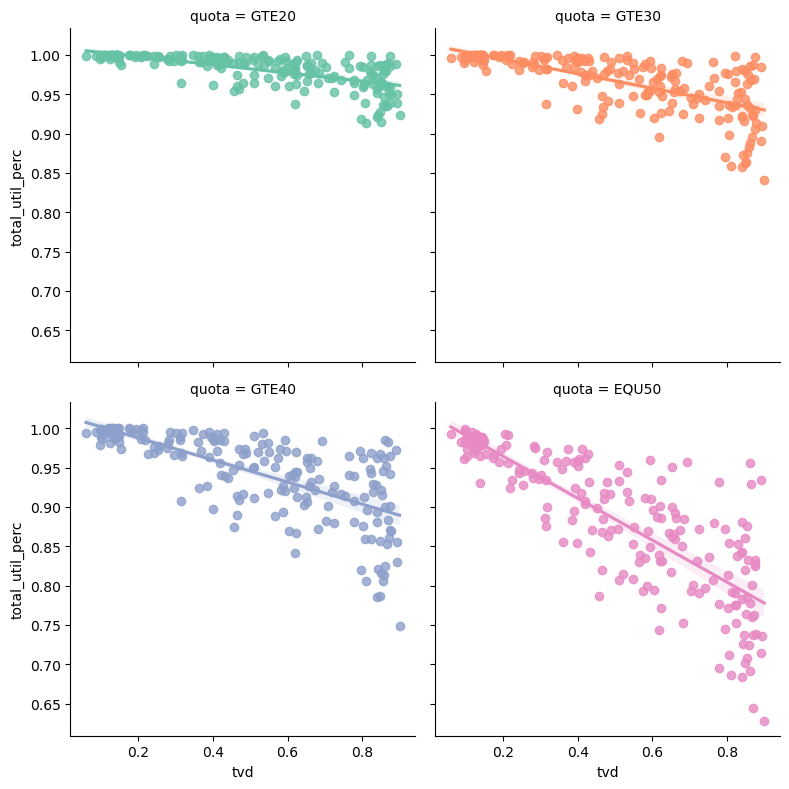

In [55]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="total_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

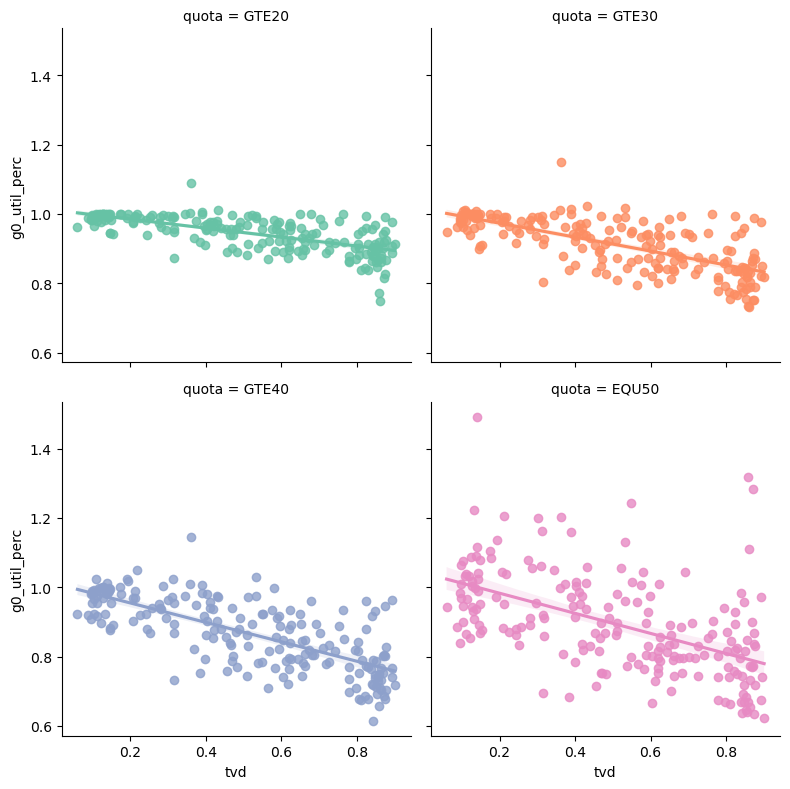

In [56]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g0_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

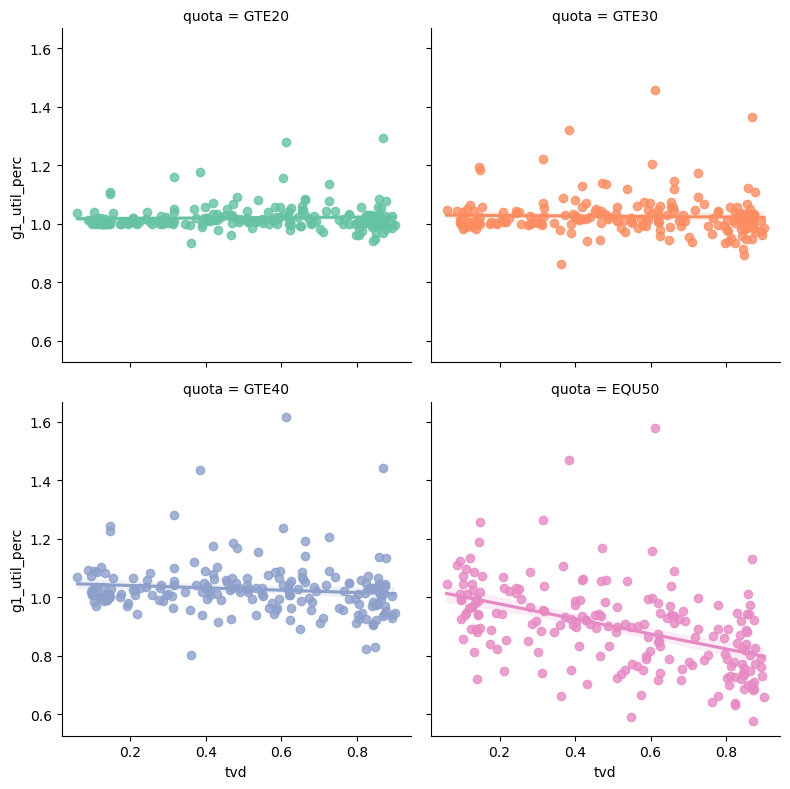

In [57]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE.name], x="tvd", y="g1_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

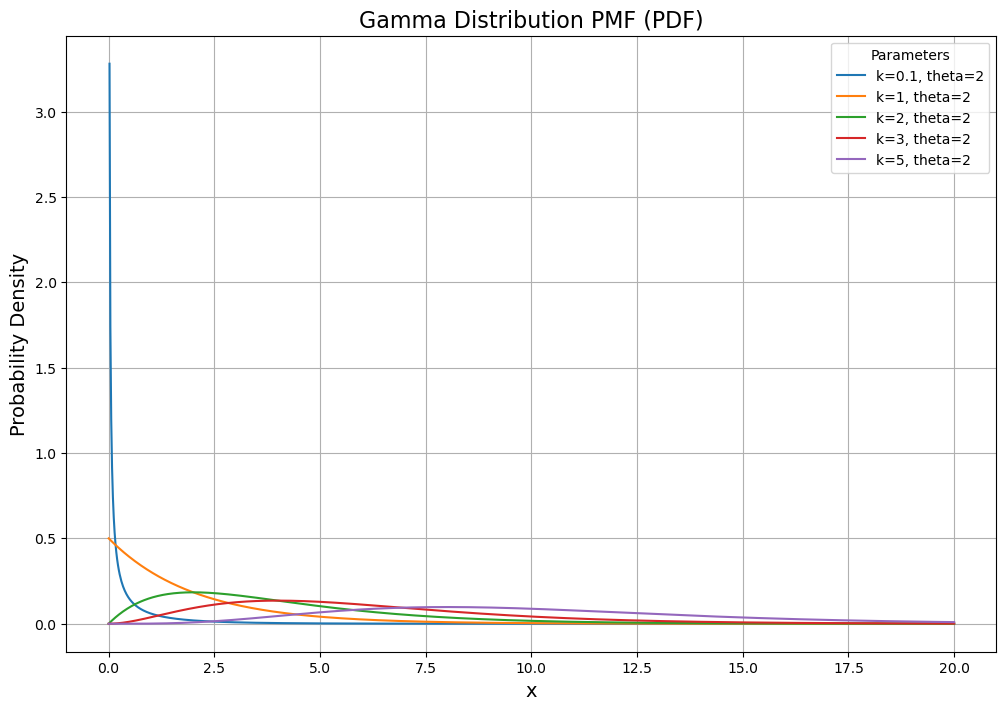

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the parameters for the Gamma distribution
shape_params = [0.1, 1, 2, 3, 5]  # Shape parameters (k)
scale_params = [2]  # Scale parameters (theta)

# Create a grid for the x values
x = np.linspace(0, 20, 1000)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each combination of shape and scale parameters
for k in shape_params:
    for theta in scale_params:
        # Compute the PMF (or PDF, as PMF is typically for discrete)
        pmf_values = gamma.pdf(x, a=k, scale=theta)

        # Plot the values
        sns.lineplot(x=x, y=pmf_values, label=f"k={k}, theta={theta}")

# Customize the plot
plt.title("Gamma Distribution PMF (PDF)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Parameters")
plt.grid(True)

# Show the plot
plt.show()

<Axes: >

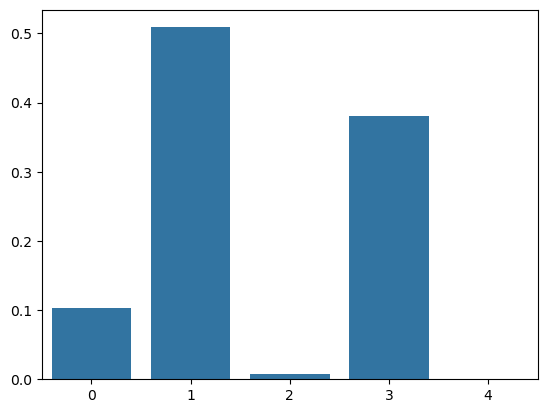

In [28]:
k = np.random.choice(len(simulations))
idx = np.random.choice(simulations[k].data.prefs.shape[0])
sns.barplot(simulations[k].data.prefs[idx])

In [107]:
stick_breaking(10, 10)

array([0.11407941, 0.32570107, 0.02767615, 0.00592941, 0.20433529,
       0.00076306, 0.0833997 , 0.12062375, 0.11582296, 0.0016692 ])